# ***Zipf’s Law in Justin Bieber’s Lyrics 🎶***
In this project, we explore **Zipf's Law using the lyrics of Justin Bieber**.


Lyrics are a creative form of language and may still follow Zipf's Law despite their artistic structure. We'll analyze word usage across Justin Bieber's songs to see if this natural law applies.

**Dataset:** Contains song lyrics, titles, albums, and release dates of Justin Bieber's music.




## **👨‍💻 Team Details**

###📚 **Course:** *Mathematics for Computer Science - II*

###👨‍🏫 **Instructor:** *Mr. Rishabh Bafna*

###📌 **Project Title:** *Zipf’s Law on Justin Bieber’s Lyrics*

###👥 **Team Name:** *Pani_Pee_Liya*

###👩‍💻 **Team Members:**
####🧑‍🎓 Member 1: **Yash Pratap Singh Solanki** (Yashpratap.solanki@adypu.edu.in) – 2024-B-18112003

####🧑‍🎓 Member 2: **Archisman Nath Choudhury** (archisman.choudhury@adypu.edu.in) – 2024-B-29012005

####🧑‍🎓 Member 3: **Aaryan Sahu** (Aaryan.Sahu@adypu.edu.in) – 2024-B-18092006

####🧑‍🎓 Member 4: **Milan Kumar** (milan.kumar@adypu.edu.in) – 2024-B-12092004


## What is Zipf's Law?
Zipf's law is also known as the principle of least effort. In natural language texts, it has been observed that:

The second most used word appears half as often as the most used word.
The third most used word appears one-third the number of times the most used word appears, and so on.

Zipf proposed that such a distribution was observed because we tend to frequently use words that we are more comfortable with. We try to communicate as efficiently as possible by putting in the least amount of effort.

## Objective
To examine the word frequency distribution in Justin Bieber’s lyrics and verify whether it conforms to Zipf’s Law — a principle that suggests the frequency of any word is inversely proportional to its rank in the frequency table.
In simpler terms, the expected behavior is that:



*   `If we plot word frequency versus rank, we should observe a rapidly declining curve.`
*   `If we plot the same data on a log-log scale, the points should form a roughly straight line — indicating a power-law distribution.`

### Expected curve of Rank vs Frequency of words as per Zipf's Law

a) Rank vs Frequency normal plot ***(rapidly declining curve)***

b) Rank vs Frequency log-log plot ***(roughly straight line)***

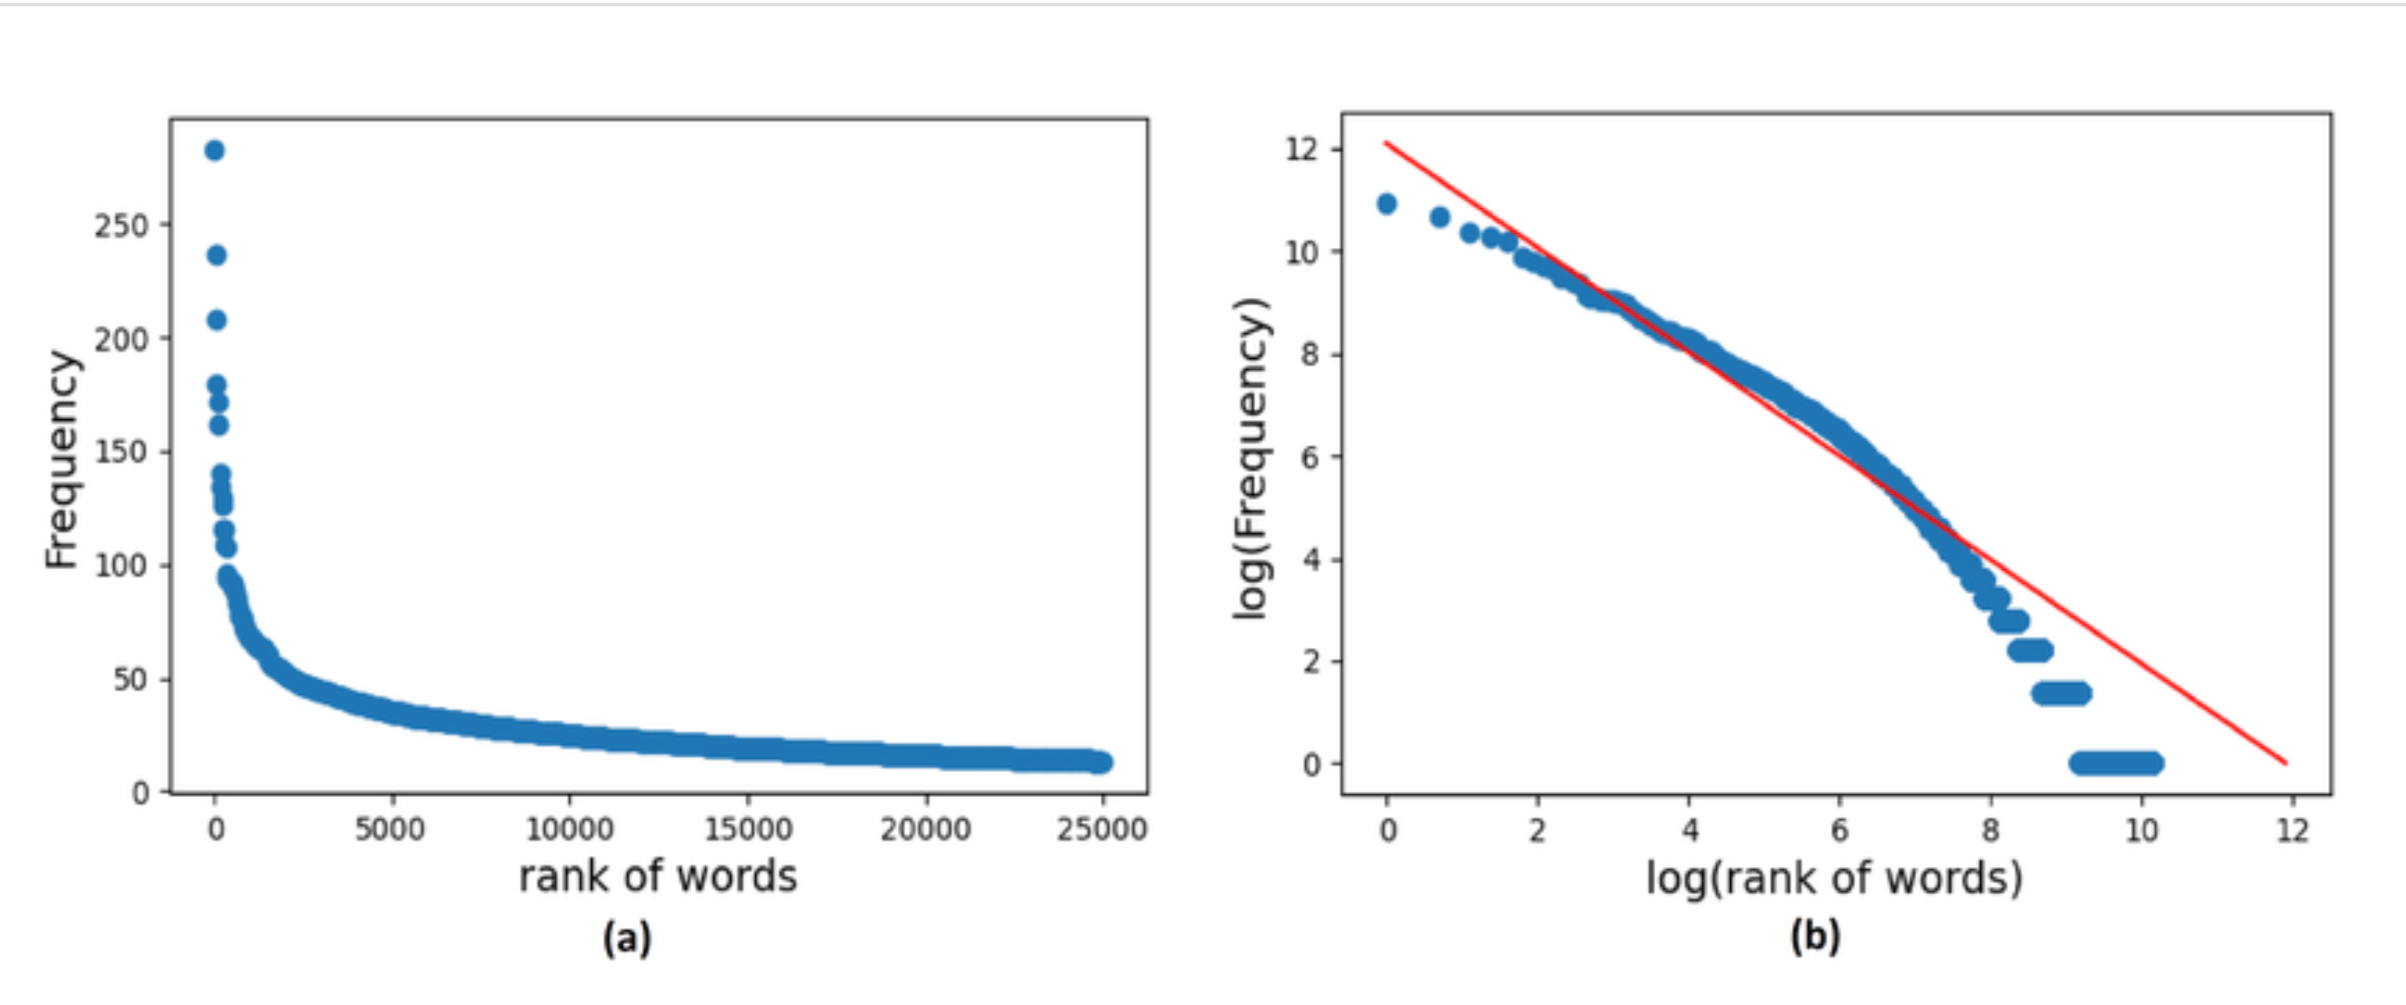

In [2]:
# Importing libraries for data analysis and visualization

import numpy as np                # for log plots
import pandas as pd               # for data handling

import matplotlib.pyplot as plt   # for plotting
import seaborn as sns             # for prettier plots

from collections import Counter   # for word frequency
import re                         # for cleaning text

**Step 1. Load the Dataset**

In [3]:
# Load the dataset
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1hpVnl7-xv-1Ce2a4rnhIZwDEuRbMAWdR')

# Display the first few rows to inspect the dataset
df.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Justin Bieber,Love Yourself,Purpose (Deluxe),2015.0,2015-11-13,produced by benny blanco for all the times t...
1,1,Justin Bieber,Sorry,Purpose (Deluxe),2015.0,2015-10-23,written by julia michaels justin tranter and j...
2,2,Justin Bieber,Yummy,Changes,2020.0,2020-01-03,yeah you got that yummyyum that yummyyum that ...
3,3,Justin Bieber,As Long as You Love Me,Believe,2012.0,2012-06-11,justin bieber as long as you love me love me l...
4,4,Justin Bieber,Baby,My World 2.0,2010.0,2010-01-18,produced by thedream and tricky stewart just...


**2. Check Dataset Columns**

In [4]:
# Display the column names
df.columns

Index(['Unnamed: 0', 'Artist', 'Title', 'Album', 'Year', 'Date', 'Lyric'], dtype='object')

 **3. Check for Missing Values & Data Types**

In [5]:
# Check for missing values and data types
df.info()

# Check for null values in the dataset
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  348 non-null    int64  
 1   Artist      348 non-null    object 
 2   Title       348 non-null    object 
 3   Album       264 non-null    object 
 4   Year        198 non-null    float64
 5   Date        198 non-null    object 
 6   Lyric       347 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 19.2+ KB


,0
Unnamed: 0,0
Artist,0
Title,0
Album,84
Year,150
Date,150
Lyric,1


**4. Remove Rows with NaN Lyrics**

In [6]:
# Remove rows where 'Lyric' is NaN
df = df.dropna(subset=['Lyric'])

# Check if any NaN values remain
df['Lyric'].isnull().sum()

np.int64(0)

**5. Clean the Lyrics Data**

We’ll clean the lyrics data by:



1.   Lowercasing the text
2.   Removing special characters (like punctuation)
3.   Stripping extra spaces
4.   Removing numbers (since we’re focusing on words)



In [7]:
# Function to clean the text
def clean_text(text):
    text = text.lower()                  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation (non-alphanumeric characters)
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = text.strip()                  # Remove leading/trailing whitespaces
    return text

# Apply the text cleaning function to the 'Lyric' column
df['Cleaned_Lyric'] = df['Lyric'].apply(clean_text)

# Check the first few cleaned lyrics
df[['Title', 'Cleaned_Lyric']].head()

,Title,Cleaned_Lyric
0,Love Yourself,produced by benny blanco for all the times t...
1,Sorry,written by julia michaels justin tranter and j...
2,Yummy,yeah you got that yummyyum that yummyyum that ...
3,As Long as You Love Me,justin bieber as long as you love me love me l...
4,Baby,produced by thedream and tricky stewart just...


**6. Tokenize the Lyrics Using Python’s String Methods**

In [8]:
# Function to manually tokenize text (split into words)
def tokenize_lyrics(text):
    # Split the cleaned text into words by space
    words = text.split()
    return words

# Apply the function to the 'Cleaned_Lyric' column
df['Tokenized_Lyric'] = df['Cleaned_Lyric'].apply(tokenize_lyrics)

# Check the first few tokenized lyrics
df[['Title', 'Tokenized_Lyric']].head()

,Title,Tokenized_Lyric
0,Love Yourself,"[produced, by, benny, blanco, for, all, the, t..."
1,Sorry,"[written, by, julia, michaels, justin, tranter..."
2,Yummy,"[yeah, you, got, that, yummyyum, that, yummyyu..."
3,As Long as You Love Me,"[justin, bieber, as, long, as, you, love, me, ..."
4,Baby,"[produced, by, thedream, and, tricky, stewart,..."


**7: Remove Stopwords**

Before analyzing word frequencies for Zipf’s Law, it's best to remove common words (called stopwords) like:

"a", "is", "the", "and", "to", "of", "in", "that", etc.

These words appear frequently in every text and can dominate your frequency distribution unfairly. Removing them gives us a clearer picture of meaningful content words, especially in lyrics.

In [9]:

stopwords = [
    "a", "an", "the", "and", "or", "but", "if", "in", "on", "to", "of", "for", "with",
    "as", "at", "by", "from", "up", "about", "into", "over", "after", "than", "so",
    "such", "too", "very", "can", "will", "just", "i", "me", "my", "you", "your",
    "he", "she", "it", "we", "they", "them", "his", "her", "its", "our", "their",
    "is", "am", "are", "was", "were", "be", "been", "being", "have", "has", "had",
    "do", "does", "did", "not", "this", "that", "these", "those", "what", "which",
    "who", "whom", "where", "when", "why", "how", "all", "any", "both", "each",
    "few", "more", "most", "other", "some", "such", "no", "nor", "only", "own",
    "same", "than", "too", "very", "oh", "yeah" , "im" , "dont"
]

# Remove stopwords from each tokenized lyric
def remove_stopwords(word_list):
    return [word for word in word_list if word.lower() not in stopwords]

# Apply the function to the tokenized lyrics
df['Filtered_Lyric'] = df['Tokenized_Lyric'].apply(remove_stopwords)

# Check result
df[['Title', 'Filtered_Lyric']].head()

,Title,Filtered_Lyric
0,Love Yourself,"[produced, benny, blanco, times, rained, parad..."
1,Sorry,"[written, julia, michaels, justin, tranter, ju..."
2,Yummy,"[got, yummyyum, yummyyum, yummyyummy, got, yum..."
3,As Long as You Love Me,"[justin, bieber, long, love, love, love, love,..."
4,Baby,"[produced, thedream, tricky, stewart, justin, ..."


**Step 8: Word Frequency Analysis for Zipf’s Law**

Now that we've removed stopwords, we're will:


1.   Flatten all filtered words into one big list.
2.   Count how often each word appears (using a dictionary).
3.   Sort the dictionary by frequency in descending order.
4.   Create a rank-frequency plot to check Zipf’s Law.



In [11]:
# Joining all words in all lyrics to fr=orm a single list
all_words = []
for words in df['Filtered_Lyric']:
    all_words.extend(words)
# print(all_words)

# If you want yo want to apply Zipf's Law withour removing the stopwords(common english words),
# you can comment the code block just above the current one, and then to create the above all_words list
# use the column 'Tokenized_Lyric' in place of 'Filtered_Lyric'.


# Creating a dictionary to store frequency count of all unique words
word_freq = {}
for word in all_words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1
# print(word_freq)

# Convert dictionary to list of (word, frequency) pairs
word_freq_list = list(word_freq.items())

# Sort using basic logic (by frequency in descending order using bubble sort)
for i in range(len(word_freq_list)):
    for j in range(i + 1, len(word_freq_list)):
        if word_freq_list[i][1] < word_freq_list[j][1]:
            # Swap positions
            word_freq_list[i], word_freq_list[j] = word_freq_list[j], word_freq_list[i]

# Basic EDA Analysis

print(len(df)) # Number of songs analyzed
print(len(all_words)) # Number of words in lyrics altogether
print(len(word_freq_list)) # Number of unique words in lyrics altogether
word_freq_list[:10] # Top 10 most frequent words

347
57235
4420


[('love', 1099),
 ('girl', 977),
 ('know', 893),
 ('like', 842),
 ('baby', 794),
 ('bieber', 641),
 ('go', 627),
 ('youre', 615),
 ('one', 608),
 ('never', 578)]

**9: Plotting Rank vs Frequency (Zipf’s Law)**

Zipf’s Law says:

`"The frequency of a word is inversely proportional to its rank."`

That means the most common word appears twice as often as the second most common, three times as often as the third, etc.

Let's check that out.

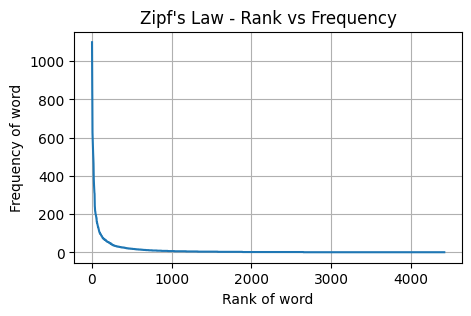

In [13]:
# Step 1: Prepare ranks and frequencies
ranks = []
frequencies = []

for i in range(len(word_freq_list)):
    ranks.append(i + 1)
    frequencies.append(word_freq_list[i][1])
# print(len(frequencies))


# Step 2: Ploting Rank vs Frequency curve using normal plot
plt.figure(figsize=(5,3))
plt.plot(ranks, frequencies)
plt.xlabel('Rank of word')
plt.ylabel('Frequency of word')
plt.title('Zipf\'s Law - Rank vs Frequency')
plt.grid(True)
plt.show()



**10: Zipf's law in action**

If our normal plot showed a steep curve that bends down, then we're already seeing Zipf’s effect in action.

But to really confirm Zipf’s Law, the log-log plot is 🔑 — it turns the curve into (almost) a straight line, which is what Zipf predicted.

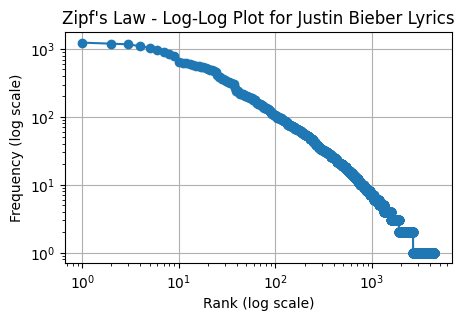

In [ ]:
# Ploting Rank vs Frequency curve using normal plot
plt.figure(figsize=(5, 3))
plt.loglog(ranks, frequencies, marker='o')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Zipf\'s Law - Log-Log Plot for Justin Bieber Lyrics')
plt.grid(True)
plt.show()


# 📊 Zipf’s Law Analysis – Does Our Data Follow It?
Zipf’s Law predicts:

A small set of words (like "love", "girl", "like" ) will occur very frequently.

Most other words will appear rarely.

The frequency will drop roughly as 1/rank.

## 🔍 Visual Verification
####1️⃣ Rank vs Frequency Plot (Linear Scale)
Shows a steep decline, where top-ranked words dominate in frequency.

This confirms that the word distribution is not uniform, but instead highly skewed, matching the typical pattern described by Zipf’s Law.

####2️⃣ Log-Log Plot of Rank vs Frequency
Displays a near-linear trend on log-log axes.

A straight line in this plot implies a power-law relationship, which is a hallmark of Zipfian distributions.

The slope also supports the inverse proportionality between rank and frequency.

##✅ Conclusion
Both plots provide strong evidence that Justin Bieber’s lyrics follow Zipf’s Law. This demonstrates that even in modern pop music, natural language properties remain intact, reinforcing the universality of Zipf’s distribution in human language use.

## Roles and Responsibilities:

### 1. Yash Pratap Singh Soalnki `🎯 Data Exploration & Visualization Lead`

Led the Exploratory Data Analysis (EDA) process by analyzing word distributions, generating insightful plots, and interpreting the trends to assess alignment with Zipf’s Law.

### 2. Milan Kumar `🎨 Presentation & Documentation Designer`

Crafted the final PowerPoint deck, created clear and engaging visual summaries, and ensured the overall presentation was cohesive, informative, and aesthetically pleasing.

### 3. Aaryan Sahu `📚 Content & Research Coordinator`

Researched and compiled background on Zipf’s Law, framed the project’s objective, drafted explanatory content for the notebook, and articulated key findings clearly.

### 4. Archisman Nath Choudhury `🛠️ Implementation & Coding Expert`

Handled core coding tasks—text cleaning, word frequency computation, sorting, and preparing the Zipfian plots—ensuring accuracy and efficiency in analysis.

